## LASSO Regression

Least Absolute Shrinkage Operator 


### Importing Packages

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

### Importing Data/Data Cleaning

In [3]:
df = pd.read_csv("Data/data_clean.csv", index_col=[0])
df = df.dropna()
df

,score,Influence,Modesty,Daring,Confidence,Ruling,Responsibility,IntrovExtro,Success,Humble,...,Confidence in Success,MakeBelieve,Leadership Origin,Biography,Public Opinion,Capability,Extraordinary,elapse,gender,age
0,18,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,211,1,50
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,149,1,40
2,27,1,0,0,0,1,1,1,1,1,...,1,1,1,1,0,1,1,168,1,28
3,29,1,1,0,1,1,1,1,1,0,...,1,1,1,0,0,1,0,230,1,37
4,19,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,1,361,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,243,1,24
10414,10,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,197,1,39
10415,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,447,2,33
10416,12,0,0,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,167,1,24


<IPython.core.display.Javascript object>

In [4]:
# Create dummy variables for gender
dummies = pd.get_dummies(df["gender"])
dummies = dummies.rename(columns={1: "Male", 2: "Female", 3: "Other"})

<IPython.core.display.Javascript object>

### LASSO Regression

In [5]:
# Preparing X and Y
y = df["score"]
X_numerical = df[["elapse", "age"]]
list_numerical = X_numerical.columns
X = pd.concat([X_numerical, dummies[["Male", "Female", "Other"]]], axis=1)

<IPython.core.display.Javascript object>

In [6]:
# Lasso Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Fitting LASSO Model
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

# Measures of Accuracy 
print("R squared training set", round(reg.score(X_train, y_train), 2))
print("R squared test set", round(reg.score(X_test, y_test), 2))

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


R squared training set 0.04
R squared test set 0.04
MSE training set 69.89
MSE test set 69.73


<IPython.core.display.Javascript object>

### Tuning Hyperparameters

Text(0.5, 1.0, 'LASSO Coefficients vs Regularization Parameters')

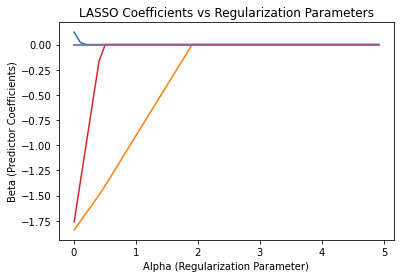

<IPython.core.display.Javascript object>

In [7]:
# Graph
coef = []
alphas = np.arange(0.01, 5, 0.10)
lasso = Lasso(max_iter=10000)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Alpha (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("LASSO Coefficients vs Regularization Parameters")


In [8]:
# K Fold Cross Validation
model = LassoCV(cv=10, random_state=1, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_

0.004411607344696783

<IPython.core.display.Javascript object>

In [9]:
X

,elapse,age,Male,Female,Other
0,211,50,1,0,0
1,149,40,1,0,0
2,168,28,1,0,0
3,230,37,1,0,0
4,361,27,1,0,0
...,...,...,...,...,...
10413,243,24,1,0,0
10414,197,39,1,0,0
10415,447,33,0,1,0
10416,167,24,1,0,0


<IPython.core.display.Javascript object>

In [10]:
coefs = np.array(model.coef_)
coefs

array([ 0.12775121, -1.8448974 ,  0.        , -1.78322728,  0.        ])

<IPython.core.display.Javascript object>

### Final Model

$Y = 0.12775121X_{elapse} -1.84489742X_{age} - 1.78322728X_{Female}$